# Capstone Webscrapping using BeautifulSoup

This notebook contains guidances & tasks on the data processing for the application

## background

Ethereum adalah token Aset Kripto yang mirip dengan bitcoin karena dapat digunakan dalam transaksi peer-to-peer, atau dibeli dan dijual di bursa dengan nilai spekulatif.<br>
Ether memiliki banyak aplikasi di luar penggunaannya sebagai token atau mata uang virtual, dan ada banyak proyek menarik sedang dibangun di jaringan Ethereum.<br>
Pada Capstone ini kita mencoba menganalisa volume perdagangan Ethereum dari periode Januari 2020 hingga Juni 2021.<br>
Historical Data pergerakan Volume dan Market Cap Ethereum kita ambil dari  [CoinGecko.com](https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-07-01)

## Requesting the Data and Creating a BeautifulSoup

Let's begin with requesting the web from the site with `get` method.

In [1]:
import requests

url_get = requests.get('https://www.coingecko.com/en/coins/ethereum/historical_data/usd?start_date=2020-01-01&end_date=2021-06-30')

To visualize what exactly you get from the `request.get`, we can use .content so ee what we exactly get, in here i slice it so it won't make our screen full of the html we get from the page. You can delete the slicing if you want to see what we fully get.

In [2]:
url_get.content[1:500]

b'!DOCTYPE html>\n<html lang="en">\n<head>\n<meta charset="utf-8">\n<meta http-equiv="X-UA-Compatible" content="IE=edge">\n<meta name="viewport" content="width=device-width, initial-scale=1.0">\n<link rel="shortcut icon" href="/favicon.ico">\n<link type="application/opensearchdescription+xml" rel="search" href="/OpensearchDescription.xml" />\n<title>Ethereum USD Historical Data | CoinGecko</title>\n<meta name="description" content="Get Ethereum (ETH) USD historical prices." />\n\n\n<script>(function(w,d,s,l,'

As we can see we get a very unstructured and complex html, which actually contains the codes needed to show the webpages on your web browser. But we as human still confused what and where we can use that piece of code, so here where we use the beautifulsoup. Beautiful soup class will result a beautifulsoup object. Beautiful Soup transforms a complex HTML document into a complex tree of Python objects. 

Let's make Beautiful soup object and feel free to explore the object here.

In [3]:
from bs4 import BeautifulSoup 

soup = BeautifulSoup(url_get.content,"html.parser")

## Finding the right key to scrap the data & Extracting the right information

Find the key and put the key into the `.find()` Put all the exploring the right key at this cell.

Pada tahapan ini kita harus menemukan key yang tepat untuk dapat mengambil seluruh informasi historical Ethereum. <br>
Untuk mendapatkan seluruh historical data, kita menggunakan key `.find(tbody)`, karena dengan menggunakan key tersebut kita datap mengambil seluruh informasi yang ada di table

In [4]:
table = soup.find('tbody')
print(table.prettify()[1:500])

tbody>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-30
  </th>
  <td class="text-center">
   $253,607,549,372
  </td>
  <td class="text-center">
   $27,149,143,847
  </td>
  <td class="text-center">
   $2,169.40
  </td>
  <td class="text-center">
   N/A
  </td>
 </tr>
 <tr>
  <th class="font-semibold text-center" scope="row">
   2021-06-29
  </th>
  <td class="text-center">
   $243,040,539,437
  </td>
  <td class="text-center">
   $30,629,329,806
  </td>
  <td class="te


Finding row length.

In [5]:
rows = table.find_all('tr')
row_length = len(rows)
row_length

547

Do the scrapping process here

Langkah pertama yang dilakukan adalah `.find_all(['td','th'])` untuk mendapatkan seluruh data yang ada dan menyimpan ke dalam object `cols`. <br>
Selanjutnya adalah melakukan iterasi dan menyimpan datanya ke object `temp`

In [6]:
temp = [] #initiating a tuple

for row in rows:
    cols = row.find_all(['td','th'])
    cols = [ele.text.strip() for ele in cols]
    temp.append([ele for ele in cols if ele])

temp[:5]

[['2021-06-30', '$253,607,549,372', '$27,149,143,847', '$2,169.40', 'N/A'],
 ['2021-06-29',
  '$243,040,539,437',
  '$30,629,329,806',
  '$2,087.52',
  '$2,169.40'],
 ['2021-06-28',
  '$229,354,016,311',
  '$24,316,408,028',
  '$1,973.93',
  '$2,087.52'],
 ['2021-06-27',
  '$209,989,265,221',
  '$24,249,510,321',
  '$1,817.05',
  '$1,973.93'],
 ['2021-06-26',
  '$213,871,849,532',
  '$25,981,381,067',
  '$1,833.46',
  '$1,817.05']]

## Creating data frame & Data wrangling

Put the array into dataframe

In [7]:
import pandas as pd

df = pd.DataFrame(temp, columns = ('Date','Market_Cap','Volume', 'Open', 'Close' ))
df.head()

,Date,Market_Cap,Volume,Open,Close
0,2021-06-30,"$253,607,549,372","$27,149,143,847","$2,169.40",N/A
1,2021-06-29,"$243,040,539,437","$30,629,329,806","$2,087.52","$2,169.40"
2,2021-06-28,"$229,354,016,311","$24,316,408,028","$1,973.93","$2,087.52"
3,2021-06-27,"$209,989,265,221","$24,249,510,321","$1,817.05","$1,973.93"
4,2021-06-26,"$213,871,849,532","$25,981,381,067","$1,833.46","$1,817.05"


In [8]:
df.dtypes

Date          object
Market_Cap    object
Volume        object
Open          object
Close         object
dtype: object

In [9]:
pd.options.display.float_format = '{:.2f}'.format

Do the data cleaning here

Dari informasi tipe diatas, berikut adalah langkah-langkah yang dilakukan untuk data cleaning:<br>
    - Merubah data **Date** menjadi `datetime`,<br>
    - Menghilangkan kode currency,<br>
    - Merubah data **Market Cap, Volume** menjadi `integer`,<br>
    - Merubah data **Open, Close** menjadi `float`,<br>
    - Mengisi value N/A pada Close dengan value yang di dapat dari website untuk tanggal 30 Juni 2021 ,<br>
    - Memberikan format separator untuk ribuan

In [10]:
df['Date'] = df['Date'].astype('datetime64')
df['Market_Cap'] = df['Market_Cap'].replace({'\$': '', ',': ''}, regex=True)
df['Market_Cap'] = df['Market_Cap'].astype('int64')
df['Volume'] = df['Volume'].replace({'\$': '', ',': ''}, regex=True)
df['Volume'] = df['Volume'].astype('int64')
df['Open'] = df['Open'].replace({'\$': '', ',': ''}, regex=True)
df['Open'] = df['Open'].astype('float64')
df['Close'] = df['Close'].replace({'\$': '','N/A': '2279.35', ',': ''}, regex=True) # amount close N/A diambil dari Web
df['Close'] = df['Close'].astype('float64')


df.dtypes


Date          datetime64[ns]
Market_Cap             int64
Volume                 int64
Open                 float64
Close                float64
dtype: object

In [11]:
class _IntArrayFormatter(pd.io.formats.format.GenericArrayFormatter):

    def _format_strings(self):
        formatter = self.formatter or (lambda x: ' {:,}'.format(x))
        fmt_values = [formatter(x) for x in self.values]
        return fmt_values

pd.io.formats.format.IntArrayFormatter = _IntArrayFormatter

In [12]:
df.head()

,Date,Market_Cap,Volume,Open,Close
0,2021-06-30,"253,607,549,372","27,149,143,847",2169.40,2279.35
1,2021-06-29,"243,040,539,437","30,629,329,806",2087.52,2169.40
2,2021-06-28,"229,354,016,311","24,316,408,028",1973.93,2087.52
3,2021-06-27,"209,989,265,221","24,249,510,321",1817.05,1973.93
4,2021-06-26,"213,871,849,532","25,981,381,067",1833.46,1817.05


In [13]:
df = df.set_index('Date')

Data visualisation

Pada plot Volume dapat dilihat trend volume transaksi Eteherium pada periode Jan 2020 sampai Juni 2021. <br>
Sementara pada plot Open dan Close Price dapat dilihat trend harga Ethereum

<AxesSubplot:title={'center':'Volume Ethereum from Jan-20 to Jun-21'}, xlabel='Date', ylabel='Price (in USD)'>

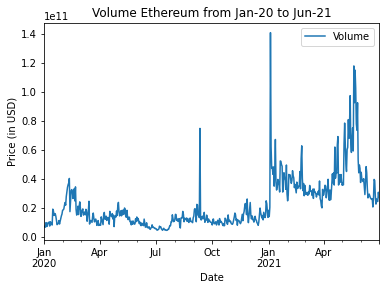

In [14]:
df[['Volume']].plot(xlabel = 'Date',
                        ylabel = "Price (in USD)",
                        title = "Volume Ethereum from Jan-20 to Jun-21")

<AxesSubplot:title={'center':'Opening and Closing Price'}, xlabel='Date', ylabel='Price (in USD)'>

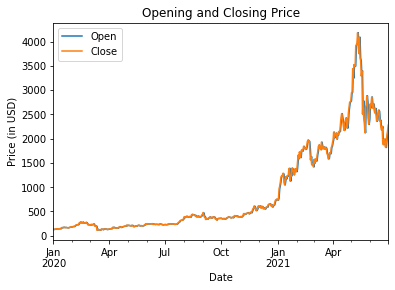

In [15]:
df[['Open','Close']].plot(
                        xlabel = 'Date',
                        ylabel = "Price (in USD)",
                        title = "Opening and Closing Price")

### Implementing your webscrapping to the flask dashboard

- Copy paste all of your web scrapping process to the desired position on the `app.py`
- Changing the title of the dasboard at `index.html`

## Finishing This Notebook with Your Analysis and Conclusion

First you can do start with making the data visualisation. 

<AxesSubplot:title={'center':'Volume vs Market_Cap Ethereum'}, xlabel='Date', ylabel='Price (in USD)'>

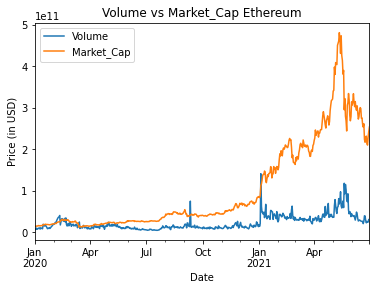

In [25]:
df[['Volume', 'Market_Cap']].plot(xlabel = 'Date',
                        ylabel = "Price (in USD)",
                        title = "Volume vs Market_Cap Ethereum")


Dari 3 Plot diatas (Volume, Open-Close, Market_Cap vs Volume) dapat ditarik kesimulan sbb: <br>
1. Volume transaksi Ethereum relatif stabil pada tahun 2020, hanya terjadi lonjakan di bulan Agustus 2020
2. Volume transaksi mengalami trend peningkatan pada tahun 2021 diawali dengan lonjakan yang cukup signifikan di Januari 2021
3. Volome terjadi peningkatan yang cukup signifikan pada Januari dan Juni 2021
4. Dari Plot Open_CLose dapat dilihat bahwa pada 2020 cenderung stabil walaupun ada tred kenaikan.
5. Tahun 2021 harga Ethereum mengalami kenaikan yang sangat signifikan, terutama di bulan May yang hampir menyentuh 5.000 USD
6. Sejalan dengan meningkatnya harga Ethereum sehingga terjadi peningkatan yang sangat signifikan pada Market Cap Ethereum

Dengan melihat data-data diatas dapat disimpulan bahwa Ethereum mengalami trend kenaikan pada 2021, tetapi juga memiliki fluktuasi yang sangat tinggi. Sehingga untuk melakukan investisasi pada Ethereum harus dilakukan pada waktu yang tepat. contohnya kalau melihat data diatas akhir bulan Juni 2021 adalah saat yang tepat untuk melakukan investasi Ethereum.

### Extra Challange

This will be not included to the scoring. 

- You can create additional analysis from the data.
- Implement it to the dashboard with at `app.py` dan `index.html`.